# Etude des intégrateurs discrets

In [1]:
clear all;close all;
Fe=100;
Te=1/Fe;
Ht = @(z) (Te/2*(z+1)./(z-1));
Hf = @(z) (Te*(z)./(z-1));
Hb = @(z) (Te*(1)./(z-1));
Hth = @(w) -i*Te/2./tan(Te/2*w);

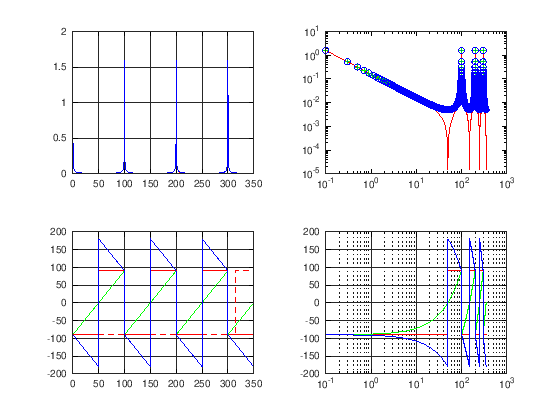

In [2]:
N=1000; Df = Fe/N;
fmin=0;
fmax= 7*Fe/2;
f=fmin:Df:fmax;
w=2*pi*f;
p=j*w;
z=exp(Te*p);

%aff = 
aff = 2:2:length(f);
%aff = 2:(floor(Fe/2/Df));
subplot(221)
plot(f(aff),abs(Ht(z(aff))),'r'); hold on;grid on;
plot(f(aff),abs(Hth(w(aff))),'r--');
plot(f(aff),abs(Hf(z(aff))),'g')
plot(f(aff),abs(Hb(z(aff))),'b')
subplot(223)
plot(f(aff),arg(Ht(z(aff)))/2/pi*360,'r'); hold on;grid on;
plot(f(aff),arg(Hth(f(aff)))/2/pi*360,'r--'); 
plot(f(aff),arg(Hf(z(aff)))/2/pi*360,'g')
plot(f(aff),arg(Hb(z(aff)))/2/pi*360,'b')
subplot(222)
loglog(f(aff),abs(Ht(z(aff))),'r'); hold on;
loglog(f(aff),abs(Hf(z(aff))),'g+')
loglog(f(aff),abs(Hb(z(aff))),'bo')
subplot(224)
semilogx(f(aff),arg(Ht(z(aff)))/2/pi*360,'r'); hold on;grid on;
semilogx(f(aff),arg(Hf(z(aff)))/2/pi*360,'g')
semilogx(f(aff),arg(Hb(z(aff)))/2/pi*360,'b')




In [3]:
clear all;close all;
Fe=100; Te=1/Fe;

Ht = @(z) (Te/2*(z+1)./(z-1));

N=100; Df = Fe/N;
f=0:Df:3.5*Fe;
w=2*pi*f;
p=j*w;
z=exp(Te*p);

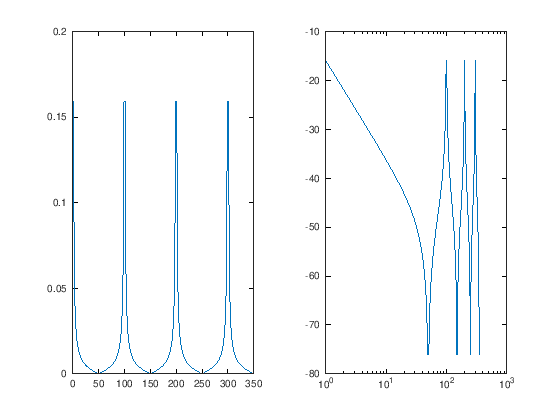

In [4]:
aff = 2:2:length(f); % exclue f=0, Fe/2 de la liste
subplot(121);plot(f(aff),abs(Ht(z(aff))));
subplot(122);semilogx(f(aff),20*log10(abs(Ht(z(aff)))))


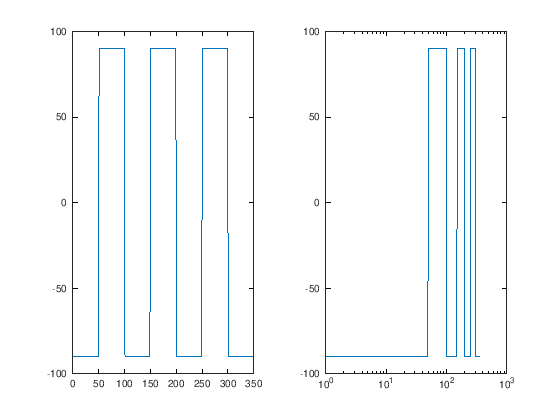

In [5]:
subplot(121);plot(f(aff),arg(Ht(z(aff)))/pi*180);
subplot(122);semilogx(f(aff),arg(Ht(z(aff)))/pi*180)

In [6]:

pkg load control
tustin=tf(Te/2*[1 1],[1 -1],Te)


Transfer function 'tustin' from input 'u1' to output ...

      0.005 z + 0.005
 y1:  ---------------
           z - 1     

Sampling time: 0.01 s
Discrete-time model.


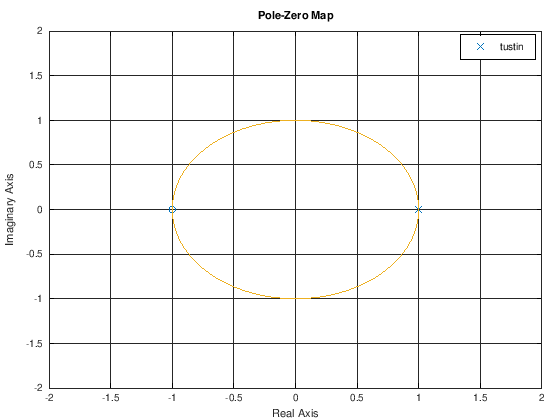

In [7]:
figure
pzmap(tustin);hold on;
axis([-2;2;-2;2])
plot(real(z),imag(z));




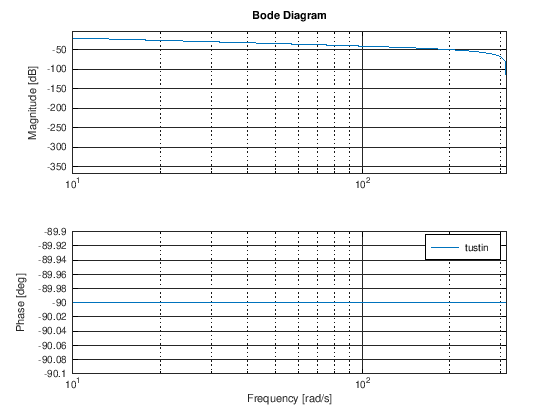

In [8]:
bode(tustin)

In [9]:
integrateur=tf([1],[1 0])
bilin=c2d(integrateur,Te,'tustin')
forward=c2d(integrateur,Te,'zoh')


Transfer function 'integrateur' from input 'u1' to output ...

      1
 y1:  -
      s

Continuous-time model.

Transfer function 'bilin' from input 'u1' to output ...

      0.005 z + 0.005
 y1:  ---------------
           z - 1     

Sampling time: 0.01 s
Discrete-time model.

Transfer function 'forward' from input 'u1' to output ...

      0.01 
 y1:  -----
      z - 1

Sampling time: 0.01 s
Discrete-time model.
